In [1]:
import h5py
import sys
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
from tools import bin_data
from scipy.interpolate import make_smoothing_spline, make_splrep, interp1d, BSpline

In [84]:
# deltas=[]
# file_ns = range(54)
# for n in file_ns:
#     f = h5py.File(f'/sdf/data/neutrino/summer25/seohyeon/edep-sim_h5_54k_raw/muon_0-1gev_run{n}.h5')
#     m_mu = 105.7 #MeV
#     trajs = f['trajectories']
    

#     for ev_n in range(1000):
#         ev_trajs_mask = trajs['event_id'] == ev_n
#         ev_trajs = trajs[ev_trajs_mask]
    
#         muon_traj_mask = ev_trajs['traj_id']==0
#         muon_traj = ev_trajs[muon_traj_mask]
#         start = muon_traj['xyz_start']
#         stop = muon_traj['xyz_end']
    
#         # getting number of delta
#         delta_mask = (ev_trajs['pdg_id'] == 11) & (ev_trajs['parent_id'] == 0) & (ev_trajs['xyz_start'].tolist() != stop.tolist())
#         delta_trajs = ev_trajs[delta_mask]
#         deltas.append(len(delta_trajs))


In [2]:
spline = np.load('/sdf/data/neutrino/summer25/seohyeon/efxns/efxns54k_truth.npz')
detailed_spl = BSpline(spline['detailed_t'], spline['detailed_c'], spline['detailed_k'])
edep_spl = BSpline(spline['edep_t'], spline['edep_c'], spline['edep_k'])



data = np.load('/sdf/data/neutrino/summer25/seohyeon/edep_estimators/muon1k_0-1gev_estimators_edep_cleaned.npz')

energies = data['energies']
detailed = data['detailed']
edep = data['edep']

detailed_res = detailed_spl(detailed) - energies
detailed_rres = detailed_res / energies

edep_res = edep_spl(edep) - energies
edep_rres = edep_res / energies


In [3]:
outlier_data = np.load('/sdf/data/neutrino/summer25/seohyeon/outliers.npz')
outliers = []
outliers.extend(outlier_data['difs'])
outliers.extend(outlier_data['scatterings'])
outliers.append(19956) # the negative energy outlier

outliers = list(set(outliers)) 


delta_data_n = np.load('deltas.npz')
delta_data_E = np.load('delta_Es.npz')
ndeltas = delta_data_n['deltas']
deltaEs = delta_data_E['deltas']


ndeltas = np.delete(ndeltas, outliers)
deltaEs = np.delete(deltaEs, outliers)


valid = (energies > 150) & (energies < 850)
detailed_res = detailed_res[valid]
detailed_rres = detailed_rres[valid]
edep_res = edep_res[valid]
edep_rres = edep_rres[valid]
ndeltas = ndeltas[valid]
deltaEs = deltaEs[valid]
energies = energies[valid]

n_evs = len(detailed_res)



# fxn of ndeltas #

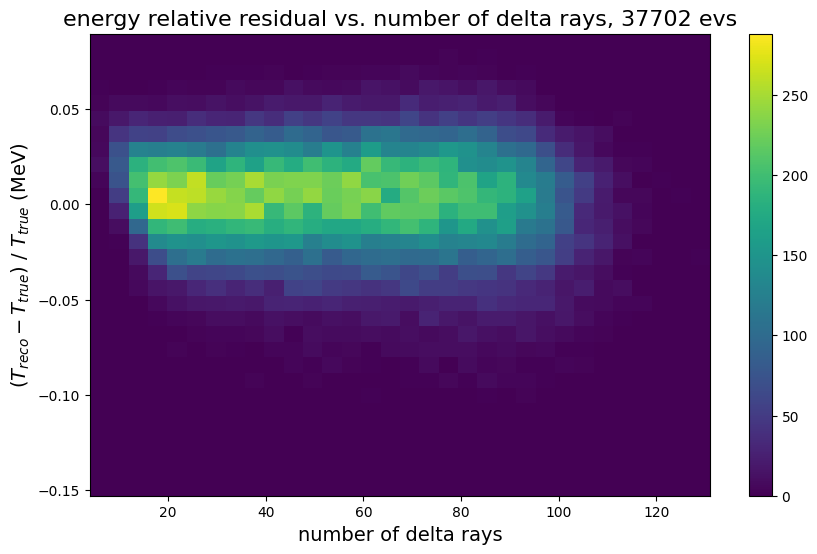

In [88]:
# with range

range_bin_midpts, range_avgs, range_errors, _ = bin_data(ndeltas, detailed_res, 40)
range_rres_bin_midpts, range_rres_avgs, range_rres_errors, _ = bin_data(ndeltas, detailed_rres, 40)

plt.figure(figsize=(10, 6))
plt.hist2d(ndeltas, detailed_res, bins=40)
plt.title(f'energy residual vs.number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'$T_{reco} - T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/ndeltas_range_res_hist.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(ndeltas, detailed_res, 'o', color='lightgray', alpha=0.3, ms=5)
plt.errorbar(range_bin_midpts, range_avgs, range_errors, fmt='o', color='black')
plt.title(f'energy residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'$T_{reco} - T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/ndeltas_range_res.png')
plt.close()


plt.figure(figsize=(10, 6))
plt.ylim(-0.15, 0.1)
plt.hist2d(ndeltas, detailed_rres, bins=(32, 30))
plt.title(f'energy relative residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) \ / \ T_{true}$ (MeV)', fontsize=14)
plt.colorbar()
plt.savefig('plots/deltas/ndeltas_range_rres_hist.png')


plt.figure(figsize=(10, 6))
plt.ylim(-0.2, 0.1)
plt.plot(ndeltas, detailed_rres, 'o', color='lightgray', alpha=0.3, ms=5)
plt.errorbar(range_rres_bin_midpts, range_rres_avgs, range_rres_errors, fmt='o', color='black')
plt.title(f'energy relative residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) \ / \ T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/ndeltas_range_rres.png')
plt.close()

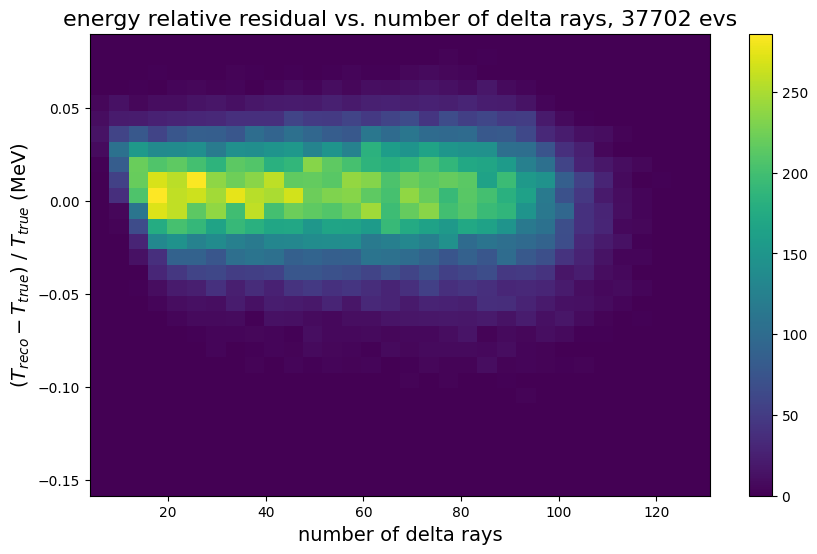

In [89]:
# with edep
edep_res_bin_midpts, edep_res_avgs, edep_res_errors, _ = bin_data(ndeltas, edep_res, 40)
edep_rres_bin_midpts, edep_rres_avgs, edep_rres_errors, _ = bin_data(ndeltas, edep_rres, 40)


plt.figure(figsize=(10, 6))
plt.hist2d(ndeltas, edep_res, bins=40)
plt.title(f'energy residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'$T_{reco} - T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/ndeltas_edep_res_hist.png')
plt.close()


plt.figure(figsize=(10, 6))
plt.plot(ndeltas, edep_res, 'o', color='lightgray', alpha=0.3, ms=5)
plt.errorbar(edep_res_bin_midpts, edep_res_avgs, edep_res_errors, fmt='o', color='black')
plt.title(f'energy residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'$T_{reco} - T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/ndeltas_edep_res.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.ylim(-0.15, 0.1)
plt.hist2d(ndeltas, edep_rres, bins=(32, 30))
plt.title(f'energy relative residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) \ / \ T_{true}$ (MeV)', fontsize=14)
plt.colorbar()
plt.savefig('plots/deltas/ndeltas_edep_rres_hist.png')

plt.figure(figsize=(10, 6))
plt.ylim(-0.2, 0.1)
plt.plot(ndeltas, edep_rres, 'o', color='lightgray', alpha=0.3, ms=5)
plt.errorbar(edep_rres_bin_midpts, edep_rres_avgs, edep_rres_errors, fmt='o', color='black')
plt.title(f'energy relative residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) / T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/ndeltas_edep_rres.png')
plt.close()


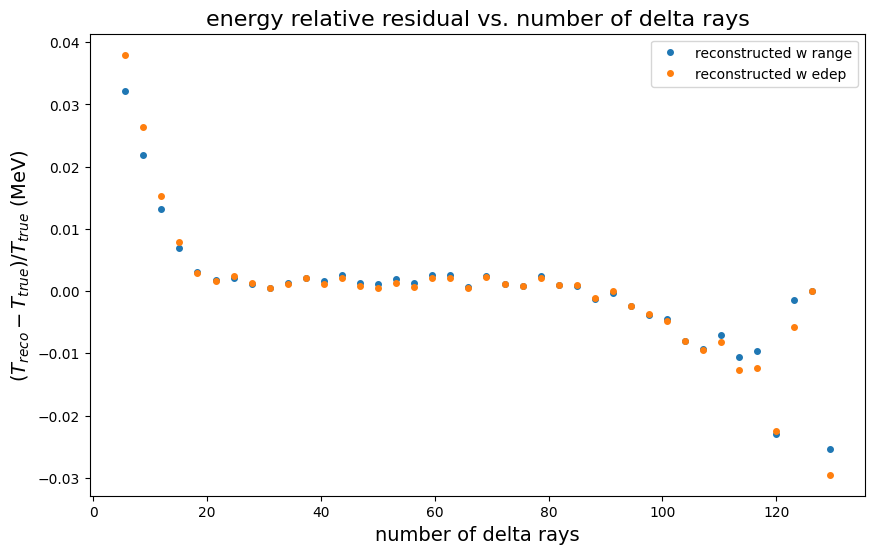

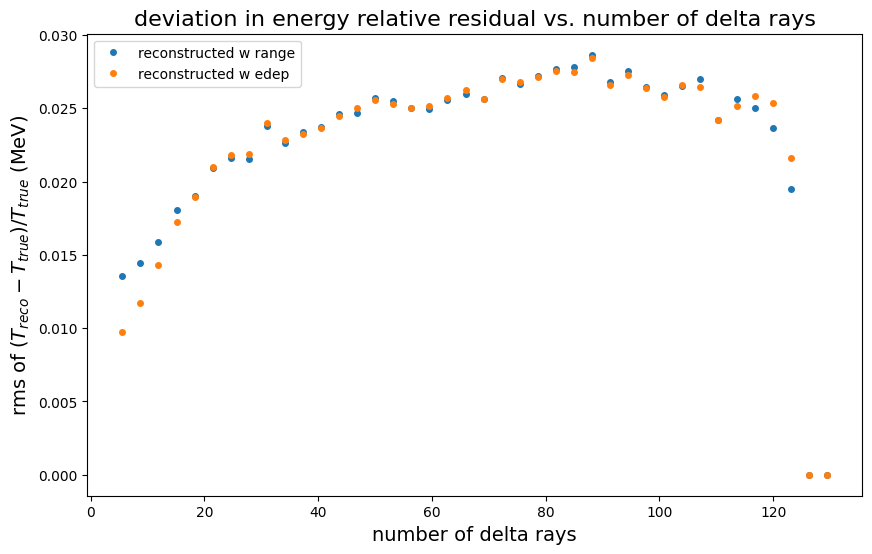

In [12]:
# comparison
plt.figure(figsize=(10, 6))
plt.plot(range_rres_bin_midpts, range_rres_avgs, 'o', label='reconstructed w range', ms=4)
plt.plot(edep_rres_bin_midpts, edep_rres_avgs, 'o', label='reconstructed w edep', ms=4)
plt.title(f'energy relative residual vs. number of delta rays', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) / T_{true}$ (MeV)', fontsize=14)
plt.legend()
plt.savefig('plots/deltas/ndeltas_rres_avgs_comp.png')

plt.figure(figsize=(10, 6))
plt.plot(range_rres_bin_midpts, range_rres_errors, 'o', label='reconstructed w range', ms=4)
plt.plot(edep_rres_bin_midpts, edep_rres_errors, 'o', label='reconstructed w edep', ms=4)
plt.title(f'deviation in energy relative residual vs. number of delta rays', fontsize=16)
plt.xlabel('number of delta rays', fontsize=14)
plt.ylabel(r'rms of $(T_{reco} - T_{true}) / T_{true}$ (MeV)', fontsize=14)
plt.legend()
plt.savefig('plots/deltas/ndeltas_rres_errors_comp.png')

# fxn of delta Es #

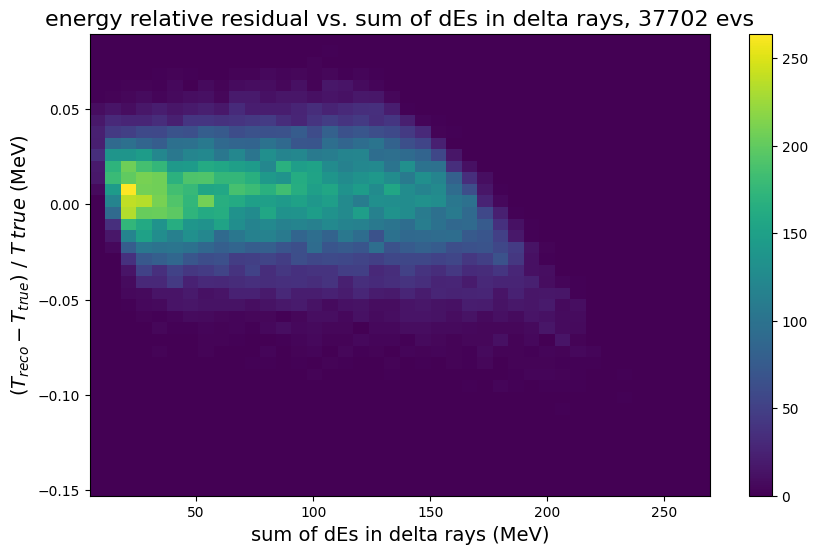

In [90]:
# with range

range_bin_midpts, range_avgs, range_errors, _ = bin_data(deltaEs, detailed_res, 40)
range_rres_bin_midpts, range_rres_avgs, range_rres_errors, _ = bin_data(deltaEs, detailed_rres, 40)

plt.figure(figsize=(10, 6))
plt.hist2d(deltaEs, detailed_res, bins=40)
plt.title(f'energy residual vs. sum of dEs in delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'$T_{reco} - T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/deltaEs_range_res_hist.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(deltaEs, detailed_res, 'o', color='lightgray', alpha=0.3, ms=3)
plt.errorbar(range_bin_midpts, range_avgs, range_errors, fmt='o', color='black')
plt.title(f'energy residual vs. sum of dEs in delta rays , {n_evs} evs', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'$T_{reco} - T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/deltaEs_range_res.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.ylim(-0.15, 0.1)
plt.hist2d(deltaEs, detailed_rres, bins=40)
plt.title(f'energy relative residual vs. sum of dEs in delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) \ / \ T_ {true}$ (MeV)', fontsize=14)
plt.colorbar()
plt.savefig('plots/deltas/deltaEs_range_rres_hist.png')


plt.figure(figsize=(10, 6))
plt.ylim(-0.22, 0.15)
plt.plot(deltaEs, detailed_rres, 'o', color='lightgray', alpha=0.3, ms=3)
plt.errorbar(range_rres_bin_midpts, range_rres_avgs, range_rres_errors, fmt='o', color='black')
plt.title(f'energy relative residual vs. sum of dEs in delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) / T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/deltaEs_range_rres.png')
plt.close()


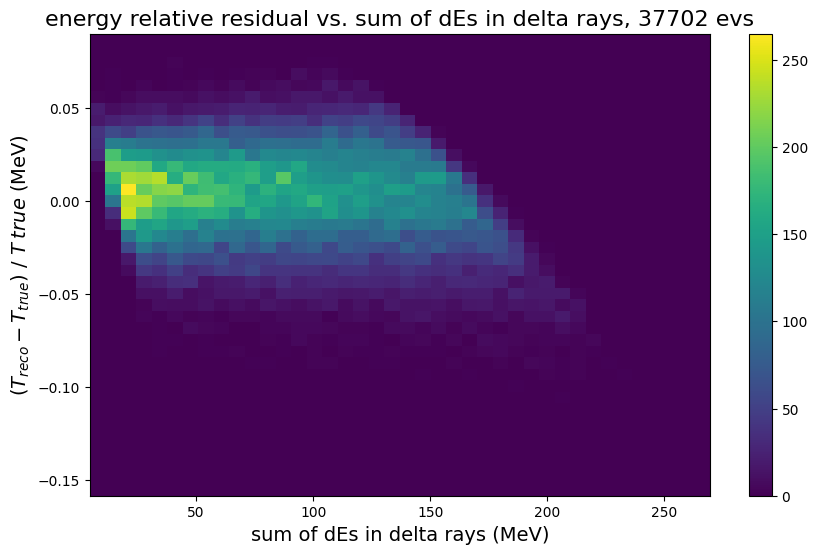

In [91]:
# with edep
edep_res_bin_midpts, edep_res_avgs, edep_res_errors, _ = bin_data(deltaEs, edep_res, 40)
edep_rres_bin_midpts, edep_rres_avgs, edep_rres_errors, _ = bin_data(deltaEs, edep_rres, 40)


plt.figure(figsize=(10, 6))
plt.hist2d(deltaEs, edep_res, bins=40)
plt.title(f'energy residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'$T_{reco} - T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/deltaEs_edep_res_hist.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(deltaEs, edep_res, 'o', color='lightgray', alpha=0.3, ms=3)
plt.errorbar(edep_res_bin_midpts, edep_res_avgs, edep_res_errors, fmt='o', color='black')
plt.title(f'energy residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'$T_{reco} - T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/deltaEs_edep_res.png')
plt.close()

plt.figure(figsize=(10, 6))
plt.ylim(-0.15, 0.1)
plt.hist2d(deltaEs, edep_rres, bins=40)
plt.title(f'energy relative residual vs. sum of dEs in delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) \ / \ T_ {true}$ (MeV)', fontsize=14)
plt.colorbar()
plt.savefig('plots/deltas/deltaEs_edep_rres_hist.png')


plt.figure(figsize=(10, 6))
plt.ylim(-0.22, 0.15)
plt.plot(deltaEs, edep_rres, 'o', color='lightgray', alpha=0.3, ms=3)
plt.errorbar(edep_rres_bin_midpts, edep_rres_avgs, edep_rres_errors, fmt='o', color='black')
plt.title(f'energy relative residual vs. number of delta rays, {n_evs} evs', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) / T_{true}$ (MeV)', fontsize=14)
plt.savefig('plots/deltas/deltaEs_edep_rres.png')
plt.close()


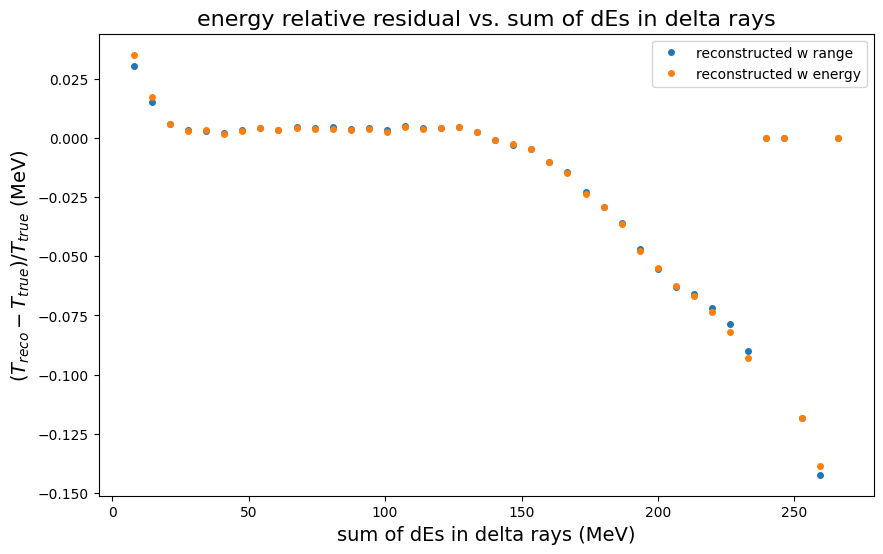

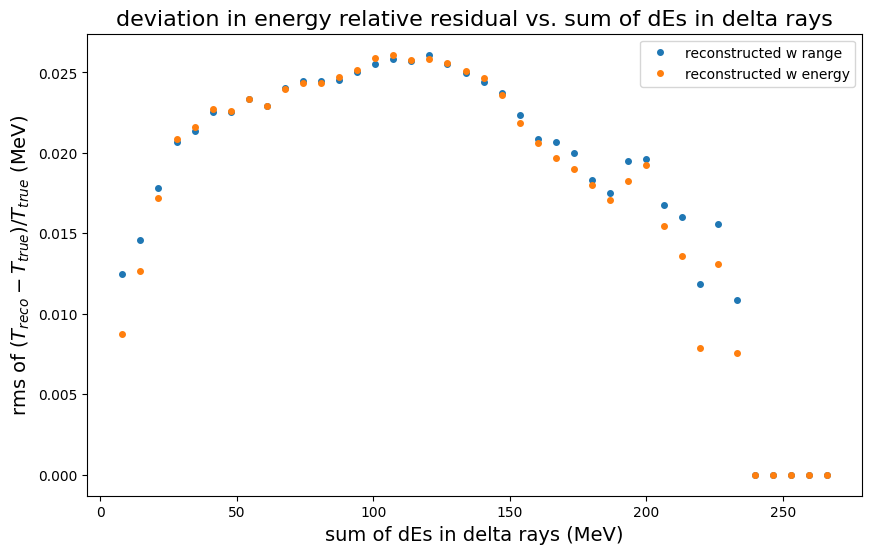

In [16]:
# comparison
plt.figure(figsize=(10, 6))
plt.plot(range_rres_bin_midpts, range_rres_avgs, 'o', label='reconstructed w range', ms=4)
plt.plot(edep_rres_bin_midpts, edep_rres_avgs, 'o', label='reconstructed w energy', ms=4)
plt.title(f'energy relative residual vs. sum of dEs in delta rays', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'$(T_{reco} - T_{true}) / T_{true}$ (MeV)', fontsize=14)
plt.legend()
plt.savefig('plots/deltas/deltaEs_range_rres_avgs.png')


plt.figure(figsize=(10, 6))
plt.plot(range_rres_bin_midpts, range_rres_errors, 'o', label='reconstructed w range', ms=4)
plt.plot(edep_rres_bin_midpts, edep_rres_errors, 'o', label='reconstructed w energy', ms=4)
plt.title(f'deviation in energy relative residual vs. sum of dEs in delta rays', fontsize=16)
plt.xlabel('sum of dEs in delta rays (MeV)', fontsize=14)
plt.ylabel(r'rms of $(T_{reco} - T_{true}) / T_{true}$ (MeV)', fontsize=14)
plt.legend()
plt.savefig('plots/deltas/deltaEs_range_rres_errors.png')



2620


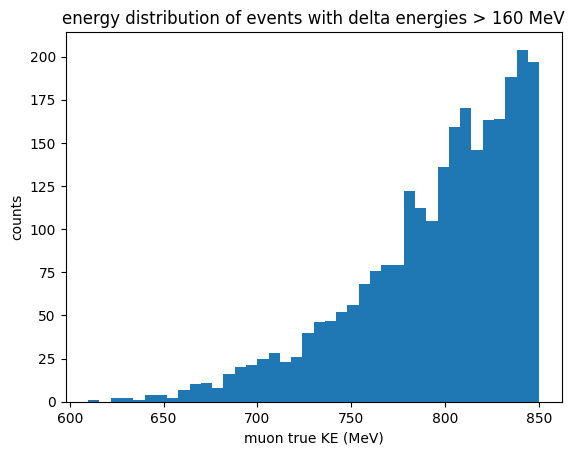

In [19]:
mask = (deltaEs > 160) 
energies_isolated = energies[mask]

print(len(energies_isolated))

plt.figure()
plt.hist(energies_isolated, bins=40)
plt.xlabel('muon true KE (MeV)')
plt.ylabel('counts')
plt.title('energy distribution of events with delta energies > 160 MeV')
plt.savefig('plots/deltas/energydist.png')